In [1]:
# https://brunch.co.kr/@chris-song/66

## Define settings

In [2]:
from scipy.stats import beta, bernoulli
import matplotlib.pyplot as plt
import numpy as np

a = 3  # there are 3 ads type in total
total_reward = 0 # sum of rewards
chosen_ads = []  # an empty list created for choosed ads
clicks = [0] * a   # '1' as a reward from each ad : click
impressions = [0] * a  # '0' as a reward from each ad : non-click
colors = ['r-', 'g-', 'b-']

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Step1. Initial

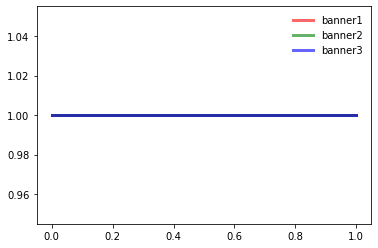

In [3]:
fig, ax = plt.subplots(1, 1)

# UCB : Deterministic / Requires update at every round
# TS : Probabilistic / Can accommodate delayed feedback / Better empirical evidence

# mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(0, 1, 100)
for i in range(a):
    ax.plot(x, beta.pdf(x, clicks[i]+1, impressions[i]+1), colors[i], lw=3, alpha=0.6, label='banner{0}'.format(i+1))
    
ax.legend(loc='best', frameon=False)
plt.show()

In [4]:
items = {
            'banner_1': {
                'clicks' : 0,
                'impressions' : 0,
                'color' : 'r-'
            },
            'banner_2': {
                'clicks' : 0,
                'impressions' : 0,
                'color' : 'g-'
            },
            'banner_3': {
                'clicks' : 0,
                'impressions' : 0,
                'color' : 'b-'
            }
        }

## Data가 쌓일 때 까지 Random 노출

In [5]:
import random

# 10번 Random 하게 시행
for i in range(10):
    did_click = 0

    banner_idx = random.randint(1,3)
    click_prob = random.random()

    if click_prob >= 0.5:
        did_click = 1
        
    print('노출_banner : {0}, click 여부 : {1}'.format(banner_idx, did_click))
    
    # update
    banner_nm = 'banner_{0}'.format(banner_idx)
    
    items[banner_nm]['impressions'] += 1
    if did_click:
        items[banner_nm]['clicks'] += 1

노출_banner : 1, click 여부 : 1
노출_banner : 1, click 여부 : 0
노출_banner : 1, click 여부 : 1
노출_banner : 3, click 여부 : 0
노출_banner : 1, click 여부 : 1
노출_banner : 2, click 여부 : 1
노출_banner : 2, click 여부 : 1
노출_banner : 3, click 여부 : 0
노출_banner : 1, click 여부 : 1
노출_banner : 1, click 여부 : 1


In [6]:
items

{'banner_1': {'clicks': 5, 'impressions': 6, 'color': 'r-'},
 'banner_2': {'clicks': 2, 'impressions': 2, 'color': 'g-'},
 'banner_3': {'clicks': 0, 'impressions': 2, 'color': 'b-'}}

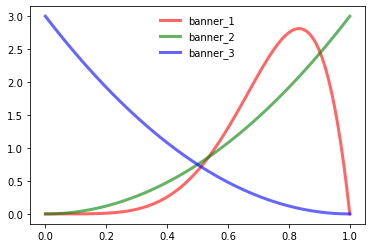

In [7]:
fig, ax = plt.subplots(1, 1)

# Random sampling

# mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(0, 1, 100)
for i in range(a):
    
    banner_name = 'banner_{0}'.format(i+1)

    item = items[banner_name]
    alpha_var = item['clicks'] + 1
    beta_var = item['impressions'] - item['clicks'] + 1
    color = item['color'] 
    
    ax.plot(x, beta.pdf(x, alpha_var, beta_var), color, lw=3, alpha=0.6, label=banner_name)
    
ax.legend(loc='best', frameon=False)
plt.show()

## Step2.Thomson sampling

In [8]:
import random

for i in range(10):
    
    ctr_list = []
    
    # ------------------
    # thomson sampling
    for i in range(a):
        banner_name = 'banner_{0}'.format(i+1)

        item = items[banner_name]
        alpha_var = item['clicks'] + 1
        beta_var = item['impressions'] - item['clicks'] + 1
        
        ctr = random.betavariate(alpha_var, beta_var)
        ctr_list.append(ctr)

    max_ctr_value = max(ctr_list)
    max_index = ctr_list.index(max_ctr_value)
    banner_idx = max_index + 1
    
    # ------------------
        
    did_click = bernoulli.rvs(max_ctr_value) # Random variates.
        
    print('노출_banner : {0}, click 여부 : {1}'.format(banner_idx, did_click))
    
    # update
    banner_nm = 'banner_{0}'.format(banner_idx)
    
    items[banner_nm]['impressions'] += 1
    if did_click:
        items[banner_nm]['clicks'] += 1

노출_banner : 1, click 여부 : 1
노출_banner : 1, click 여부 : 0
노출_banner : 2, click 여부 : 1
노출_banner : 2, click 여부 : 0
노출_banner : 2, click 여부 : 1
노출_banner : 2, click 여부 : 1
노출_banner : 2, click 여부 : 1
노출_banner : 2, click 여부 : 1
노출_banner : 2, click 여부 : 1
노출_banner : 2, click 여부 : 1


In [9]:
items

{'banner_1': {'clicks': 6, 'impressions': 8, 'color': 'r-'},
 'banner_2': {'clicks': 9, 'impressions': 10, 'color': 'g-'},
 'banner_3': {'clicks': 0, 'impressions': 2, 'color': 'b-'}}

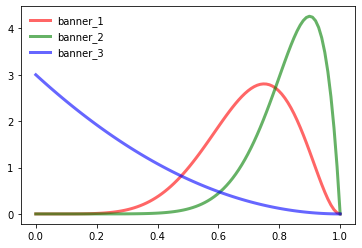

In [10]:
fig, ax = plt.subplots(1, 1)

# Random sampling

# mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(0, 1, 100)
for i in range(a):
    
    banner_name = 'banner_{0}'.format(i+1)

    item = items[banner_name]
    alpha_var = item['clicks'] + 1
    beta_var = item['impressions'] - item['clicks'] + 1
    color = item['color'] 
    
    ax.plot(x, beta.pdf(x, alpha_var, beta_var), color, lw=3, alpha=0.6, label=banner_name)
    
ax.legend(loc='best', frameon=False)
plt.show()